In [1]:
import h5py
import matplotlib.pyplot as plt

import sys
sys.path.append('../..')

from muon_regression.muon_regression.plotting import event_display as ed

/Users/lucamasserano/Desktop/uni/cmu/ada/ada_code/hep-lfi/lib/python3.8/site-packages/uproot3/__init__.py:127: FutureWarning: Consider switching from 'uproot3' to 'uproot', since the new interface became the default in 2020.

    pip install -U uproot

In Python:

    >>> import uproot
    >>> with uproot.open(...) as file:
    ...

  warnings.warn(
/Users/lucamasserano/Desktop/uni/cmu/ada/ada_code/hep-lfi/lib/python3.8/site-packages/awkward0/__init__.py:12: FutureWarning: Consider switching from 'awkward0' to 'awkward', since the new interface became the default in 2020.

    pip install -U awkward

In Python:

    >>> import awkward as ak
    >>> new_style_array = ak.from_awkward0(old_style_array)
    >>> old_style_array = ak.to_awkward0(new_style_array)

  warnings.warn(


## Muon hit 2D slab plot

In [2]:
file = h5py.File('/Users/lucamasserano/Desktop/uni/cmu/ada/ada_code/1.hdf5', 'r')
file.keys()

<KeysViewHDF5 ['E', 'hl_x', 'meta', 'y']>

Dimensions: (muon, calorimeter, z-cell, x-cell, y-cell). <br>
The dimension named 'calorimeter' apparently is just a *box* containing the actual grid 

In [3]:
hits = file['E']
hits

<HDF5 dataset "E": shape (1200, 1, 50, 32, 32), type "<f4">

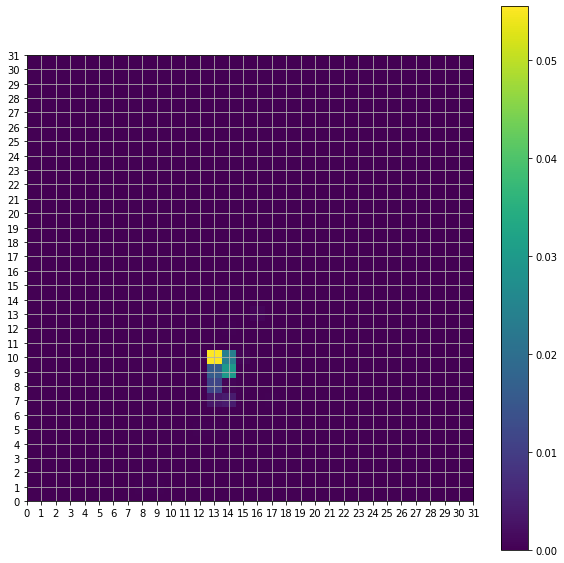

In [25]:
# plot muon hit on second layer of calorimeter
fig, ax = plt.subplots(figsize=(10, 10))
plot = ax.imshow(hits[0][0][1].T)
plt.grid()
plt.xticks(range(32))
plt.yticks(range(32))
plt.gca().invert_yaxis()
plt.xlim((0,31))
plt.ylim((0,31))
fig.colorbar(plot)
plt.show()

## Muon hit 3D plot

The exact x,y,z position and cell size is needed for 3D plot, hence they use full info from .root files, not just 32x32x50 energy values.

In [2]:
calorimeter, true_energy = ed.load_tree('/Users/lucamasserano/Downloads/root_files/1.root')

In [3]:
calorimeter.shape, true_energy.shape

((1200, 50, 32, 32, 6), (1200,))

plotting...


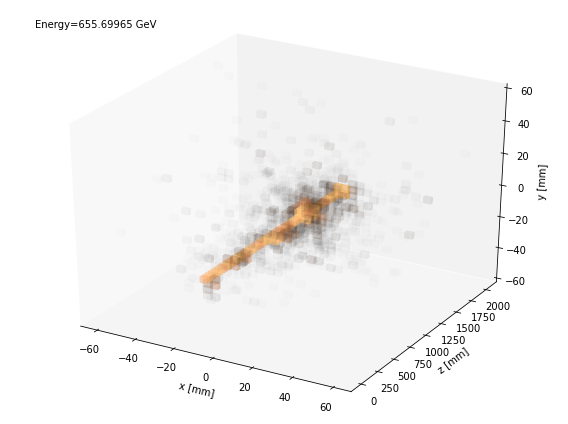

In [4]:
ed.plot_eventdisplay(event=0, calo=calorimeter, true_energy=true_energy)